In [1]:
import bagpy
from bagpy import bagreader
import pandas as pd
import seaborn as sea
import matplotlib.pyplot as plt
import numpy as np
from rs_elements import *

In [4]:
name ="_2021-09-07-22-44-27.bag"
# name = "_2021-09-07-22-48-11.bag"
# name = "_2021-09-07-22-51-30.bag"
b = bagreader('2feb/' + name)

[INFO]  Data folder 2feb/_2021-09-07-22-44-27 already exists. Not creating.


In [5]:
b.topics

dict_keys(['/back_to_route/control', '/back_to_route/control_log', '/back_to_route/control_status', '/back_to_route/rs_path', '/nodelet_manager/bond', '/rosout', '/scan', '/scan_filtered', '/wr_control/mower_control', '/wr_ekf/ctrl_state', '/wr_ekf/est_state', '/wr_map/grid_map', '/wr_map/grid_map_local', '/wr_map/human_grid_map', '/wr_map/human_grid_map_local', '/wr_map/human_obstacles_vectors', '/wr_map/obstacles_vectors', '/wr_sensors/imu', '/wr_sensors/nl_triplet'])

In [6]:
def parse_bag_data(filename, ind, colomn_name):
    df_date = pd.read_csv(filename)
    rs_path_string = df_date[colomn_name][ind]
    rs_path_string = rs_path_string[1:len(rs_path_string)-1]
    rs_elems_str = rs_path_string.split(",")
    return rs_elems_str

def make_RS_path(filename, ind, colomn_name):
    rs_elems_str = parse_bag_data(filename, ind, colomn_name)
    rs_element_list = []
    for ind in range(len(rs_elems_str)):   
        rs_elems_str[ind].split()
        rs_elem_str = rs_elems_str[ind].split()
        elem_type = int(rs_elem_str[1])
        if(elem_type == 0):
            elem_type_str = 's'
        elif(elem_type == 1):
            elem_type_str = 'l'
        elif(elem_type == 2):
            elem_type_str = 'r'

        length = float(rs_elem_str[3])
        x = float(rs_elem_str[6])
        y = float(rs_elem_str[8])
        yaw = float(rs_elem_str[10])
        start_pos = np.array([x, y, yaw])
        rs_element = RS_element()
        rs_element.type = elem_type_str
        rs_element.start_point = start_pos
        rs_element.length = length
        rs_element_list.append(rs_element)

    path = Path()
    path.rs_elements = rs_element_list
    return path

def make_obstacles_data(filename, ind, colomn_name):
    str_list = parse_bag_data(filename, ind, colomn_name )
    data = []
    if(str_list!=[""]):
        for ind in range(len(str_list)):
            pos_str = str_list[ind].split()
            x = float(pos_str[1])
            y = float(pos_str[3])
            data.append([x, y])
    data = np.array(data)
    return data


In [46]:

bagData_Est_state = b.message_by_topic("/wr_ekf/est_state")
df_date_est_state = pd.read_csv(bagData_Est_state)
x = df_date_est_state["pos.x"].to_numpy()
y = df_date_est_state["pos.y"].to_numpy()
z = df_date_est_state["pos.z"].to_numpy()
T = df_date_est_state["Time"].to_numpy()
df_date_est_state

Time  stamp.secs  stamp.nsecs      pos.x      pos.y     pos.z  \
0     1.631044e+09  1631043873    909727156 -16.121988  14.696907 -6.090737   
1     1.631044e+09  1631043873    920449036 -16.122082  14.696964 -6.091494   
2     1.631044e+09  1631043873    929913032 -16.124666  14.700428 -6.077140   
3     1.631044e+09  1631043873    939672251 -16.124714  14.700418 -6.077249   
4     1.631044e+09  1631043873    949740691 -16.124762  14.700410 -6.077358   
...            ...         ...          ...        ...        ...       ...   
8231  1.631044e+09  1631043956    219827492 -21.996487   2.676795 -6.315514   
8232  1.631044e+09  1631043956    230241913 -21.996492   2.676740 -6.315388   
8233  1.631044e+09  1631043956    239901403 -21.995823   2.685684 -6.316362   
8234  1.631044e+09  1631043956    249706379 -21.995832   2.685789 -6.316250   
8235  1.631044e+09  1631043956    259733085 -21.995842   2.685894 -6.316138   

         vel.x     vel.y     vel.z     att.x     att.y     att.z     att.w  
0    -0.009333  0.005523 -0.075975  0.037267  0.032325 -0.743697  0.666694  
1    -0.009333  0.005524 -0.075975  0.037270  0.032327 -0.743697  0.666694  
2    -0.004807 -0.001154 -0.011095  0.038194  0.038825 -0.743120  0.666938  
3    -0.004807 -0.001153 -0.011095  0.038196  0.038827 -0.743120  0.666938  
4    -0.004819 -0.001207 -0.011144  0.038198  0.038829 -0.743120  0.666938  
...        ...       ...       ...       ...       ...       ...       ...  
8231  0.000187 -0.005223  0.012030  0.031520 -0.003044 -0.156768  0.987128  
8232  0.000187 -0.005223  0.012030  0.031518 -0.003037 -0.156768  0.987128  
8233 -0.000121  0.010577  0.010676  0.037500 -0.002715 -0.158046  0.986716  
8234 -0.000121  0.010577  0.010676  0.037499 -0.002709 -0.158045  0.986716  
8235 -0.000122  0.010629  0.010687  0.037496 -0.002702 -0.158045  0.986716  

[8236 rows x 13 columns]

In [47]:
bagData_RS_path = b.message_by_topic("/back_to_route/rs_path")
df_date = pd.read_csv(bagData_RS_path)
n_replanning = len(df_date)
print(df_date)
time_of_replanning = np.unique(df_date["Time"].to_numpy())
print(time_of_replanning)

           Time  stamp.secs  stamp.nsecs  total_length  \
0  1.631044e+09  1631043893    463159295     15.808056   
1  1.631044e+09  1631043893    574479739     15.809038   
2  1.631044e+09  1631043897    601534525     14.579389   
3  1.631044e+09  1631043897    734711943     14.670732   
4  1.631044e+09  1631043902    776491387     12.270929   
5  1.631044e+09  1631043904    518162311     11.560174   
6  1.631044e+09  1631043921    677831984      4.898302   
7  1.631044e+09  1631043943    238517312      2.312038   
8  1.631044e+09  1631043945    117565666      1.936334   

                                         rs_elements  
0  [elem_type: 0\nlength: 1.2000000476837158\nsta...  
1  [elem_type: 0\nlength: 1.2000000476837158\nsta...  
2  [elem_type: 2\nlength: 0.6000000238418579\nsta...  
3  [elem_type: 0\nlength: 2.4000000953674316\nsta...  
4  [elem_type: 0\nlength: 0.6000000238418579\nsta...  
5  [elem_type: 2\nlength: 0.6000000238418579\nsta...  
6  [elem_type: 1\nlength: 1.507076

In [52]:
time_of_replanning[3]

1631043897.738637

In [54]:
indexes_of_replan = []
for t in time_of_replanning:
    ind = 0
    for t_ in T:
        if(abs(t-t_)<0.01):
            indexes_of_replan.append(ind)
            print(t)
            break
        ind+=1
indexes_of_replan

1631043893.46411
1631043893.5753248
1631043897.6024055
1631043897.738637
1631043902.7797065
1631043904.521309
1631043921.6812916
1631043943.242323
1631043945.1320016


[1955, 1966, 2369, 2382, 2886, 3060, 4777, 6932, 7120]

No data on the topic:wr_map/obstacles_vectors
No data on the topic:wr_map/human_obstacles_vectors
-16.122228622436523 14.699909210205078


(-22.261823169919815,
 -15.829866977318268,
 2.4334928682181567,
 15.284024274109218)

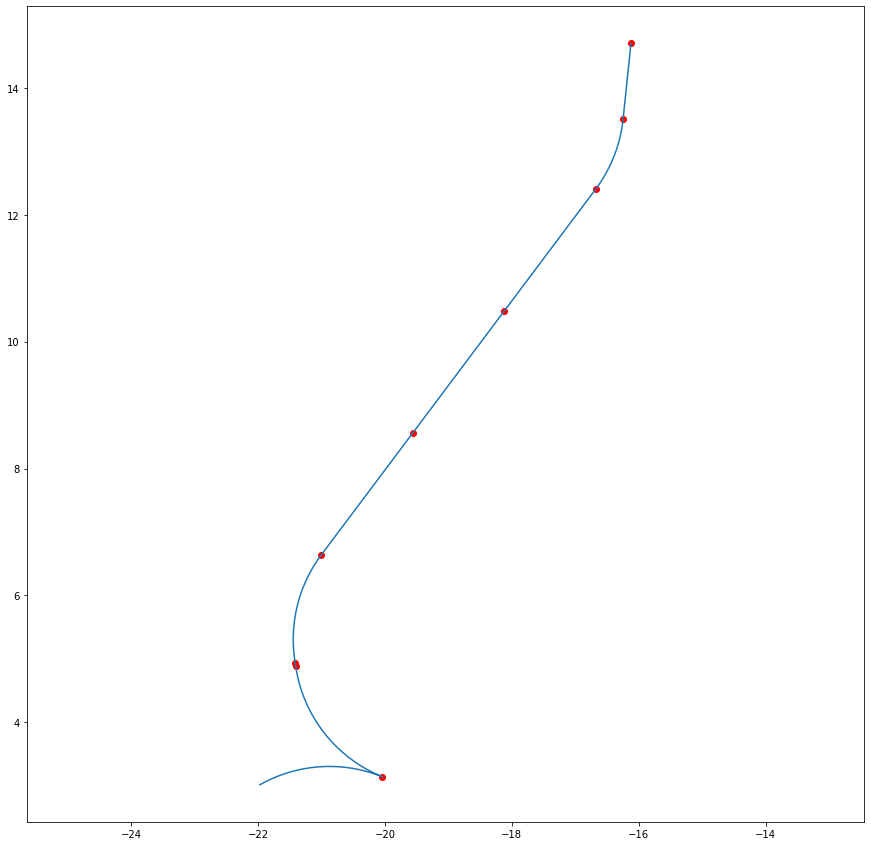

In [104]:
n = 1
U = 0.45# corvature of trajectory
bagData_RS_path = b.message_by_topic("/back_to_route/rs_path")
path = make_RS_path(bagData_RS_path, n,"rs_elements")
rs_path_seed(0.1, U, path)
points = []
for ind in range(len(path.rs_elements)):
    points.append(path.rs_elements[ind].start_point)
points = np.array(points)

fig = plt.figure(figsize = (15, 15))

bagData_obstacles_vec = b.message_by_topic("wr_map/obstacles_vectors")
if(bagData_obstacles_vec!=None):
    obstacle_data_vec = make_obstacles_data(bagData_obstacles_vec, ind, "vectors")
    plt.scatter(obstacle_data_vec[:,0], obstacle_data_vec[:,1], c = 'k')
bagData_obstacles_h = b.message_by_topic("wr_map/human_obstacles_vectors")
if(bagData_obstacles_h!=None):
    obstacle_data_hum = make_obstacles_data(bagData_obstacles_h, ind, "vectors")
    plt.scatter(obstacle_data[:,0], obstacle_data_hum[:,1], c = 'k')


plt.scatter(points[:,0], points[:,1], c = 'r')
plt.plot(path.path_points[:,0], path.path_points[:,1])
plt.gca().set_aspect('equal', adjustable='box')

print(path.path_points[0,0], path.path_points[0,1])
plt.axis("equal")
#print(path.length)

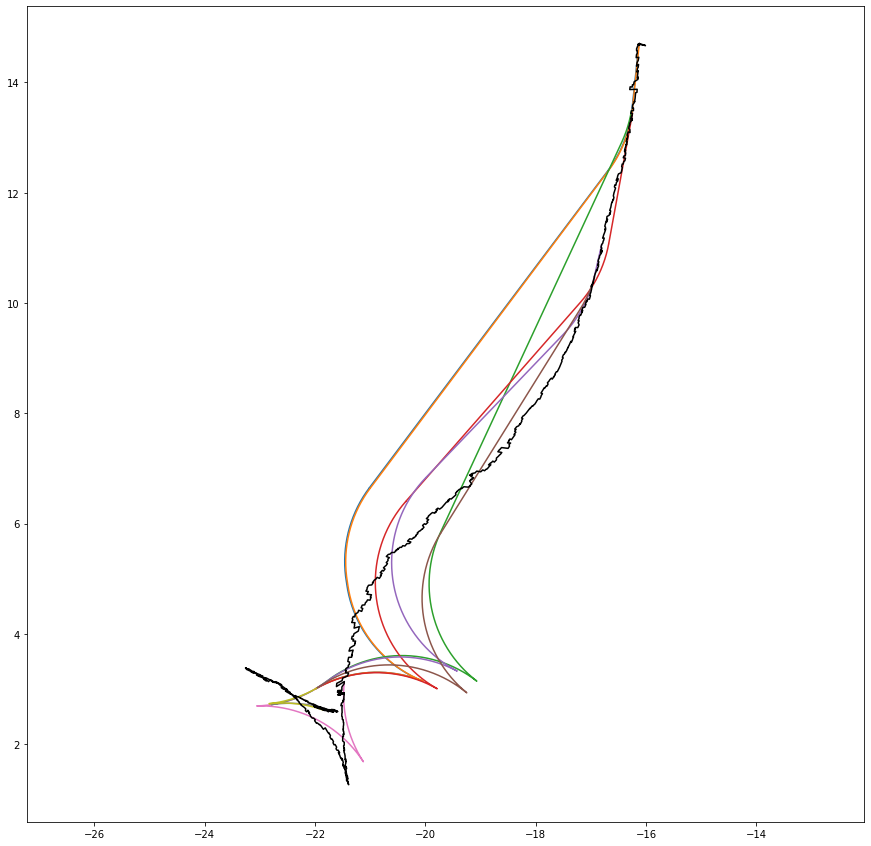

In [105]:
fig = plt.figure(figsize = (15, 15))
for n in range(n_replanning):
    bagData_RS_path = b.message_by_topic("/back_to_route/rs_path")
    path = make_RS_path(bagData_RS_path, n,"rs_elements")
    rs_path_seed(0.1, 0.45, path)

    points = []
    for ind in range(len(path.rs_elements)):
        points.append(path.rs_elements[ind].start_point)
    points = np.array(points)
    #plt.scatter(points[:,0], points[:,1], c = 'r')
    plt.plot(path.path_points[:,0], path.path_points[:,1])
    plt.gca().set_aspect('equal', adjustable='box')
    plt.axis("equal")

plt.plot(x, y,c = "k" )


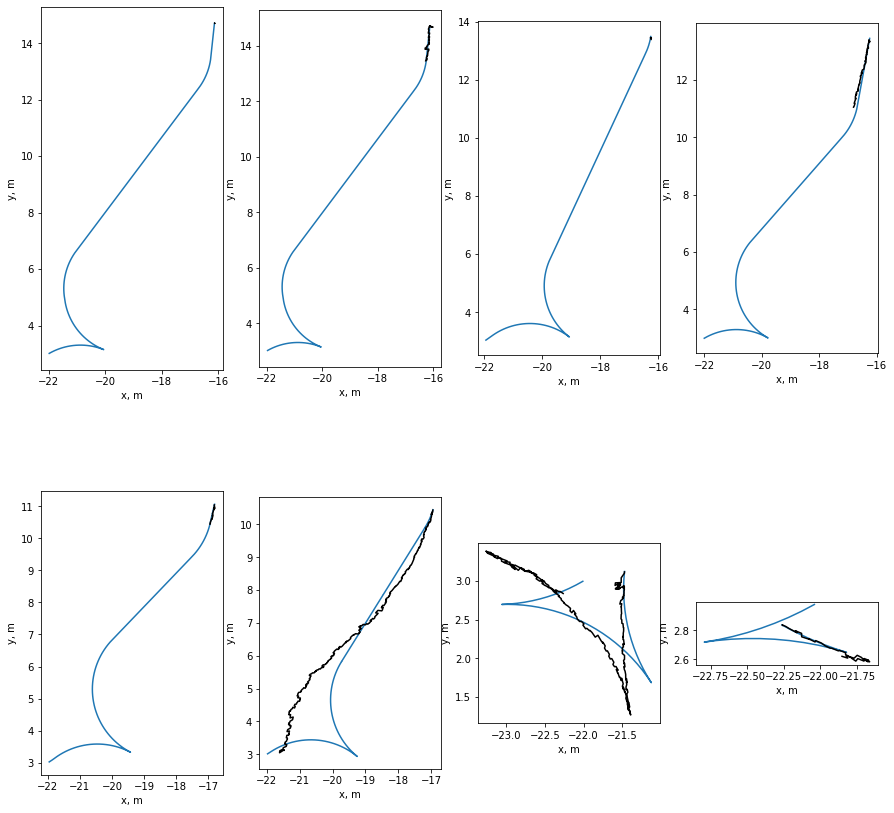

In [106]:
fig, axes = plt.subplots(2,4, figsize=(15,15))
for n, ax in enumerate(axes.ravel()):
    bagData_RS_path = b.message_by_topic("/back_to_route/rs_path")
    path = make_RS_path(bagData_RS_path, n,"rs_elements")
    rs_path_seed(0.1, 0.45, path)
#     points = []
#     for ind in range(len(path.rs_elements)):
#         points.append(path.rs_elements[ind].start_point)
#     points = np.array(points)
    #plt.scatter(points[:,0], points[:,1], c = 'r')
    ax.plot(path.path_points[:,0], path.path_points[:,1])
    #ax.gca().set_aspect('equal', adjustable='box')
    #plt.axis("equal")
    ax.set_aspect('equal', 'box')
    ind1 = indexes_of_replan[n]
    ind2 = indexes_of_replan[n+1]
    ax.plot(x[ind1:ind2], y[ind1:ind2],c = "k" )
    ax.set_xlabel("x, m")
    ax.set_ylabel("y, m")

In [107]:
coltrol_data = b.message_by_topic("/back_to_route/control")
df_date = pd.read_csv(coltrol_data)
df_date[:80]

Time  stamp.secs  stamp.nsecs       ang   vel  light
0   1.631044e+09  1631043893    377825695  0.000000   0.0      2
1   1.631044e+09  1631043893    465349967  0.000000   0.0      1
2   1.631044e+09  1631043893    471162179  0.000000   0.0      2
3   1.631044e+09  1631043893    579377036       NaN  40.0      1
4   1.631044e+09  1631043893    588154348  0.067829  40.0      1
..           ...         ...          ...       ...   ...    ...
75  1.631044e+09  1631043895      6783564  0.169541  40.0      1
76  1.631044e+09  1631043895     28284141  0.168111  40.0      1
77  1.631044e+09  1631043895     46794413  0.198456  40.0      1
78  1.631044e+09  1631043895     66813648  0.200312  40.0      1
79  1.631044e+09  1631043895     86780764  0.192272  40.0      1

[80 rows x 6 columns]

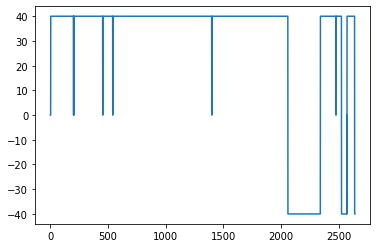

In [108]:
plt.plot(df_date["vel"].to_numpy()[:])

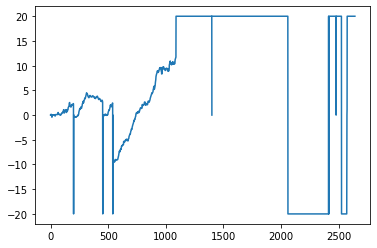

In [109]:
plt.plot(df_date["ang"].to_numpy()[:])

In [110]:
coltrol_data = b.message_by_topic("/back_to_route/control_log")
df_date = pd.read_csv(coltrol_data)
df_date

Time  stamp.secs  stamp.nsecs  ok  cfs_index     sstar  \
0     1.631044e+09  1631043893    464825391   0          0  0.000000   
1     1.631044e+09  1631043893    577710690   1          0  0.000000   
2     1.631044e+09  1631043893    587088072   1          0  0.001661   
3     1.631044e+09  1631043893    607097594   1          0  0.001563   
4     1.631044e+09  1631043893    630389313   1          0  0.001464   
...            ...         ...          ...  ..        ...       ...   
2628  1.631044e+09  1631043946    397455391   1          1  0.000000   
2629  1.631044e+09  1631043946    417610021   1          1  0.000000   
2630  1.631044e+09  1631043946    438820927   1          2  0.000000   
2631  1.631044e+09  1631043946    457464447   1          2  0.000000   
2632  1.631044e+09  1631043946    477377974   1          2  0.000000   

            p.x        p.y  p.z      dp.x      dp.y  dp.z     ddp.x     ddp.y  \
0      0.000000   0.000000  0.0  0.000000  0.000000   0.0  0.000000  0.000000   
1    -16.122229  14.699909  0.0 -0.103489 -0.994631   0.0  0.000000  0.000000   
2    -16.122435  14.697927  0.0 -0.103489 -0.994631   0.0  0.000000  0.000000   
3    -16.122423  14.698044  0.0 -0.103489 -0.994631   0.0  0.000000  0.000000   
4    -16.122410  14.698162  0.0 -0.103489 -0.994631   0.0  0.000000  0.000000   
...         ...        ...  ...       ...       ...   ...       ...       ...   
2628 -21.982824   3.010025  0.0  0.870783  0.491668   0.0 -1.092596  1.935072   
2629 -21.977440   3.013075  0.0  0.869410  0.494091   0.0 -1.097981  1.932022   
2630 -21.970455   3.017046  0.0 -0.869990 -0.493070   0.0  1.095711 -1.933311   
2631 -21.964390   3.020470  0.0 -0.871531 -0.490341   0.0  1.089646 -1.936735   
2632 -21.954681   3.025901  0.0 -0.873975 -0.485972   0.0  1.079937 -1.942166   

      ddp.z  delta_vect.x  delta_vect.y  delta_vect.z  delta_norm  
0       0.0      0.000000      0.000000           0.0    0.000000  
1       0.0      0.000000      0.000000           0.0    0.000000  
2       0.0      0.000154     -0.000016           0.0    0.000155  
3       0.0      0.000216     -0.000022           0.0    0.000217  
4       0.0      0.000273     -0.000029           0.0    0.000274  
...     ...           ...           ...           ...         ...  
2628    0.0      0.223503     -0.395840           0.0    0.454580  
2629    0.0      0.229431     -0.403708           0.0    0.464348  
2630    0.0      0.233818     -0.412557           0.0    0.474209  
2631    0.0      0.220947     -0.392712           0.0    0.450600  
2632    0.0      0.222878     -0.400824           0.0    0.458622  

[2633 rows x 19 columns]

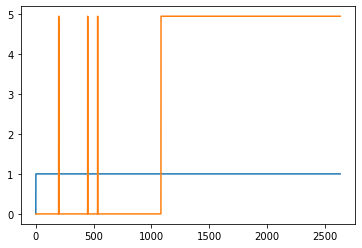

In [111]:
dp_x = df_date["dp.x"].to_numpy()
dp_y = df_date["dp.y"].to_numpy()
plt.plot(dp_x**2 + dp_y**2)
ddp_x = df_date["ddp.x"].to_numpy()
ddp_y = df_date["ddp.y"].to_numpy()
delta_x = df_date["delta_vect.x"].to_numpy()
delta_y = df_date["delta_vect.y"].to_numpy()
ddp = np.vstack([ddp_x, ddp_y]).T
Delta = np.vstack([delta_x, delta_y]).T
plt.plot(ddp_x**2 + ddp_y**2)

In [112]:
np.alltrue(np.sum(Delta*ddp, axis=1)<=0)

False

In [25]:
np.sum(Delta*ddp, axis=1)[np.where(np.sum(Delta*ddp, axis=1)>0)[0]]

array([2.39868101e-01, 5.70684062e-04, 1.14930444e-03, 3.39125214e-05,
       1.45821594e-03, 2.83165465e-03, 4.15423618e-03, 5.45986548e-03,
       1.33065213e-02, 1.33786098e-02, 1.33659133e-02, 1.33150565e-02,
       8.31251106e-03, 7.51558646e-03, 6.96876294e-03, 6.59573968e-03,
       6.22271693e-03, 5.84544853e-03, 1.35938292e-02, 1.40134416e-02,
       1.43185981e-02, 1.46788626e-02, 1.55437314e-02, 1.72265643e-02,
       1.87228787e-02, 2.01725662e-02, 2.18935394e-02, 2.38518960e-02,
       1.13946359e-02, 1.17338296e-02, 1.21154128e-02, 1.25351472e-02,
       5.09948796e-03, 3.77694446e-03, 2.44590247e-03, 1.20387593e-03,
       5.93489617e-05, 1.47302895e-02, 1.49676195e-02, 1.52049650e-02,
       1.53956837e-02, 1.53998904e-02, 1.53574539e-02, 1.09273953e-02,
       1.06900085e-02, 1.04695802e-02, 1.00372159e-02, 2.27625714e-03,
       2.08127192e-03, 2.17453264e-03, 2.26779280e-03, 1.53605994e-02,
       1.81919326e-02, 1.97135467e-02, 2.13623211e-02, 9.90636215e-03,
      

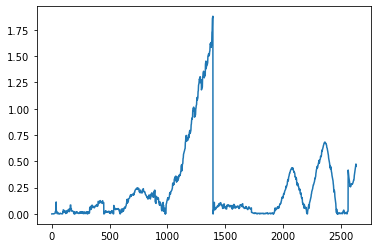

In [26]:
plt.plot(df_date["delta_norm"].to_numpy()[:])

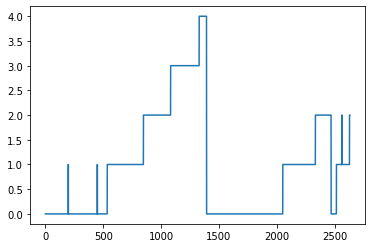

In [27]:
plt.plot(df_date["cfs_index"].to_numpy()[:])

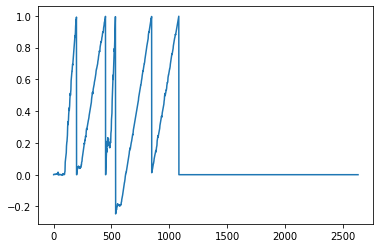

In [28]:
plt.plot(df_date["sstar"].to_numpy()[:])